In [1]:
# Command to make `src` module available in notebook
# Details: https://stackoverflow.com/a/35273613

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [8]:
import pandas as pd

from sklearn.cluster import DBSCAN

from src.dataset_builder import DatasetBuilder

In [3]:
# version 3.1

actions_df = DatasetBuilder.get_actions_df(version='3.1')

In [5]:
actions_df.head()

,date,user,pc,activity,action_type,filename,content,session_id,action_type_device,action_type_file,action_type_logon
id,,,,,,,,,,,
{S7X6-Z2CH44WU-9256VRTB},2010-01-02 06:34:00,EBH0519,PC-9573,Logon,logon,,NaN,EBH0519_1,False,False,True
{M5W6-F9WM86XO-3622DJWW},2010-01-02 06:46:00,LAD0514,PC-2567,Logon,logon,,NaN,LAD0514_1,False,False,True
{R4Y8-R9YR54PS-5374OMSK},2010-01-02 06:51:00,YXG0504,PC-4312,Logon,logon,,NaN,YXG0504_1,False,False,True
{Y1V9-F6VO51FN-3329IZSD},2010-01-02 07:06:00,JBV0604,PC-3756,Logon,logon,,NaN,JBV0604_1,False,False,True
{L3N1-D2YO72AX-3581SMQX},2010-01-02 07:06:00,NLR0174,PC-8272,Logon,logon,,NaN,NLR0174_1,False,False,True


In [4]:
sessions_df = DatasetBuilder.get_sessions_df(actions_df)

In [6]:
sessions_df.head()

,user,session_id,session_start,session_end,file_activity,file_activity_bool,device_activity,device_activity_bool,session_start_rlt,session_end_rlt
141298,EBH0519,EBH0519_1,2010-01-02 06:34:00,2010-01-02 17:43:00,0,False,0,False,0.273611,0.738194
274973,LAD0514,LAD0514_1,2010-01-02 06:46:00,2010-01-02 17:45:00,0,False,0,False,0.281944,0.739583
459575,YXG0504,YXG0504_1,2010-01-02 06:51:00,2010-01-02 08:49:55,5,True,4,True,0.285417,0.367361
220404,JBV0604,JBV0604_1,2010-01-02 07:06:00,2010-01-02 18:11:00,0,False,0,False,0.295833,0.757639
331903,NLR0174,NLR0174_1,2010-01-02 07:06:00,2010-01-02 15:07:00,3,True,4,True,0.295833,0.629861


In [11]:
def time_metric(X, Y):
    a = min(abs(Y[0] - X[0]), abs(X[0] + 1 - Y[0]))
    b = min(abs(Y[1] - X[1]), abs(X[1] + 1 - Y[1]))
    return (a * a + b * b) ** 0.5


def find_abnormal_sessions(sessions_df: pd.DataFrame):
    user_to_sessions = {
        user: sessions_df[sessions_df['user'] == user]
        for user in set(sessions_df['user'])
    }

    # используем DBSCAN
    malicios_sessions = set()
    for user, user_sessions_df in user_to_sessions.items():
        df = user_sessions_df[['session_start_rlt', 'session_end_rlt']]
        db = DBSCAN(eps=0.3, min_samples=7, metric=time_metric).fit(df)

        for session_id, pred in zip(user_sessions_df['session_id'], db.labels_):
            if pred == -1:
                malicios_sessions.add(session_id)

    return malicios_sessions


In [13]:
abnormal_login_sessions = find_abnormal_sessions(sessions_df)

In [14]:
len(abnormal_login_sessions)

40

In [16]:
actions_df = DatasetBuilder.get_actions_df(version='3.1', concat_sessions_threshold=30)
sessions_df = DatasetBuilder.get_sessions_df(actions_df)
abnormal_login_sessions = find_abnormal_sessions(sessions_df)

print(len(abnormal_login_sessions))
print(abnormal_login_sessions)

55
{'DJW0698_56', 'DJW0698_34', 'APC0027_109', 'LKF0701_91', 'JBV0604_276', 'AJO0389_45', 'LKF0701_144', 'CSF0929_133', 'SGE0112_231', 'OHE0350_279', 'JBV0604_226', 'SKC0670_46', 'HQC0608_291', 'JBV0604_255', 'HHB0090_396', 'OHE0350_195', 'DJW0698_11', 'SKC0670_19', 'CSF0929_142', 'HKK0961_230', 'CSF0929_135', 'OHE0350_63', 'CSF0929_139', 'OHE0350_274', 'JBV0604_322', 'HKK0961_7', 'HKK0961_247', 'HHB0090_249', 'HKK0961_13', 'APC0027_42', 'TJC0370_303', 'ALM0073_859', 'DJW0698_139', 'JBV0604_107', 'HQC0608_47', 'HKK0961_58', 'APC0027_47', 'JBV0604_44', 'TJC0370_91', 'LAG0639_738', 'HHL0126_185', 'DJW0698_164', 'SGE0112_139', 'HKK0961_252', 'OHE0350_116', 'BLW0787_440', 'DJW0698_232', 'CSF0929_127', 'HHB0090_217', 'HKK0961_125', 'OHE0350_174', 'QTP0493_292', 'TJC0370_66', 'LKF0701_71', 'CSF0929_130'}


In [20]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

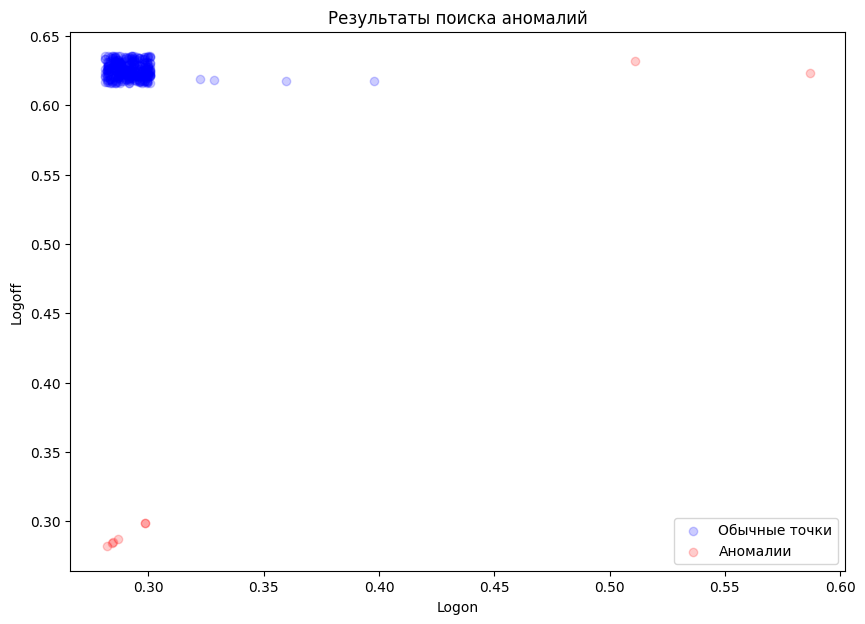

In [22]:
def draw_anomalies_session_time(data, anomalies):
    plt.figure(figsize=(10, 7))
    # Точки, предсказанные как обычные
    plt.scatter(data[anomalies == 1]['session_start_rlt'], data[anomalies == 1]['session_end_rlt'], c='blue', alpha=0.2, label='Обычные точки')
    # Точки, предсказанные как аномалии
    plt.scatter(data[anomalies == -1]['session_start_rlt'], data[anomalies == -1]['session_end_rlt'], c='red', alpha=0.2, label='Аномалии')
    plt.legend()
    plt.xlabel('Logon')
    plt.ylabel('Logoff')
    plt.title('Результаты поиска аномалий')
    plt.show()

def time_metric(X, Y):
    a = min(abs(Y[0] - X[0]),abs(X[0] + 1 - Y[0]))
    b = min(abs(Y[1] - X[1]),abs(X[1] + 1 - Y[1]))
    return (a * a + b * b) ** 0.5

user_to_sessions = {
    user: sessions_df[sessions_df['user'] == user]
    for user in set(sessions_df['user'])
}

sessions3 = user_to_sessions['DJW0698']
df = sessions3.drop(
    ['user', 'session_id', 'session_start', 'session_end', 'file_activity',
       'file_activity_bool', 'device_activity', 'device_activity_bool'],
    axis=1,
)

db = DBSCAN(eps=0.1, min_samples=10, metric=time_metric).fit(df)

draw_anomalies_session_time(df, np.array([-1 if i == -1 else 1 for i in db.labels_]))

In [ ]:
# чтобы искать аномалии в каких-то дейтсвиях типа count, можно брать должность, среднее использование у бюдей этой должности и т. д.

